In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip "/content/drive/MyDrive/tabinda_bhat.zip" -d "/content/drive/MyDrive"

Archive:  /content/drive/MyDrive/tabinda_bhat.zip
  inflating: /content/drive/MyDrive/tabinda_bhat.json  


In [7]:
import json
import pandas as pd
file = '/content/drive/MyDrive/tabinda_bhat.json'
data = None
with open(file, 'r') as f:
  data = json.load(f)

channel_id, stats = data.popitem()
channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]
print(channel_id)

UCXz_WJweVvjOIQhP728LaCg


In [8]:
# Channel statistics
print('views',channel_stats['viewCount'])
print('subscriber',channel_stats['subscriberCount'])
print('videos', channel_stats['videoCount'])

views 242
subscriber 8
videos 7


In [12]:
# video statistics
sorted_vids = sorted(video_stats.items(),key = lambda item: int(item[1]["viewCount"]),reverse = True)
stats = []
for vid in sorted_vids:
  video_id = vid[0]
  title = vid[1]["title"]
  views = int(vid[1]["viewCount"])
  likes = int(vid[1]["likeCount"])
  dislikes = int(vid[1]["dislikeCount"])
  title = vid[1]["title"]
  comments = int(vid[1]["commentCount"])
  stats.append([title,views,likes,dislikes,comments])

In [13]:
df = pd.DataFrame(stats, columns = ["title","views","likes","dislikes","comments"])
df.head(10)

,title,views,likes,dislikes,comments
0,Perform Exploratory Data Analysis on dataset S...,36,3,0,0
1,"From the given ‘Iris’ dataset, predict the opt...",34,3,0,0
2,Perform Exploratory Data Analysis’ on dataset ...,25,1,0,0
3,Stock price prediction using analysis of histo...,19,0,0,0
4,Decision Tree classifier and visualize it grap...,12,1,0,0
5,Exploratory Data Analysis on dataset Indian Pr...,11,1,0,0


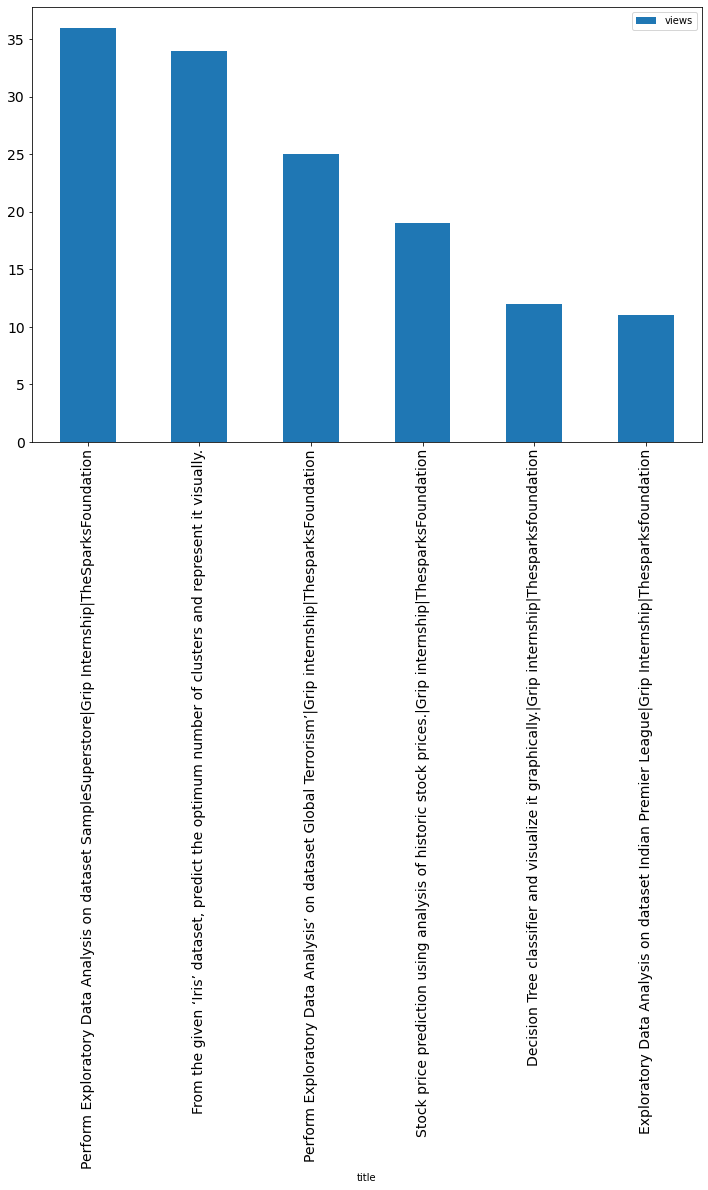

In [15]:
top10 = df.head(10)
ax = top10.plot.bar(x='title', y = 'views', figsize = (12,8), fontsize =14 )

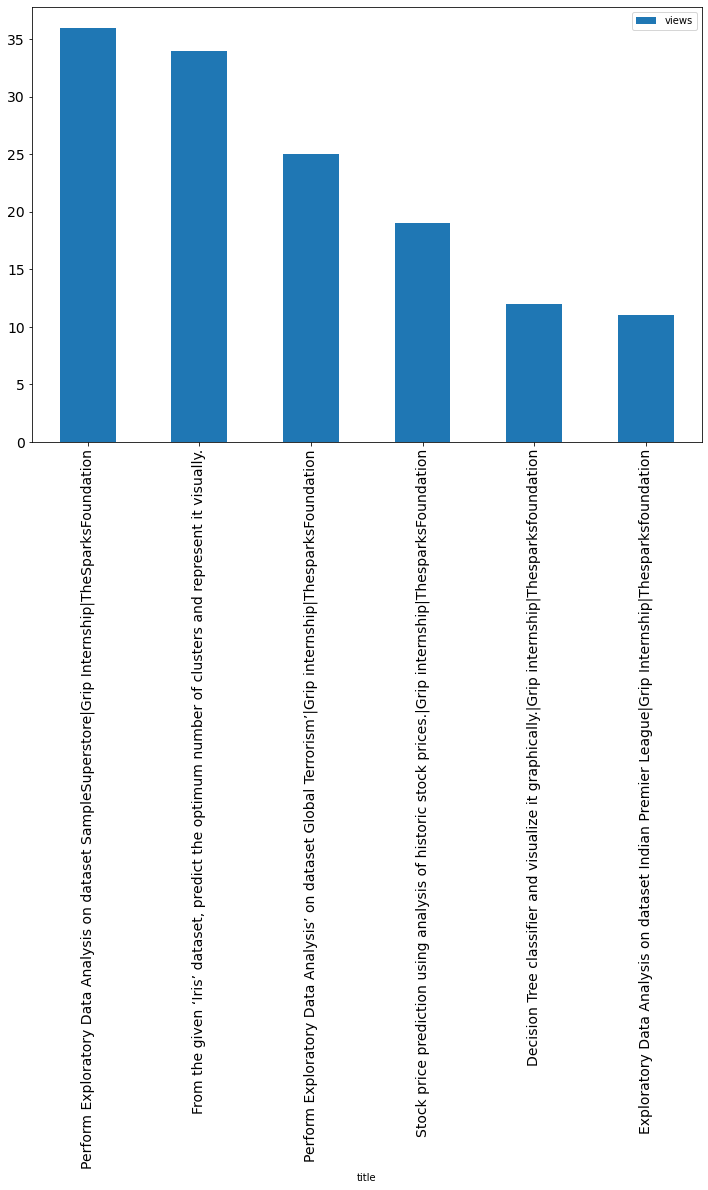

In [16]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x='title', y = 'views', figsize = (12,8), fontsize =14 )

In [17]:
# likes vs dislikes
likes_avg = top10['likes'].mean()
dislikes_avg = top10['dislikes'].mean()
comments_avg = top10['comments'].mean()
print('Top 10 ')
print('Likes average' ,likes_avg )
print('Dislikes average' ,dislikes_avg )
print('Comments average' ,comments_avg )

Top 10 
Likes average 1.5
Dislikes average 0.0
Comments average 0.0


In [18]:
# likes vs dislikes
likes_avg = bottom10['likes'].mean()
dislikes_avg = bottom10['dislikes'].mean()
comments_avg = bottom10['comments'].mean()
print('Top 10 ')
print('Likes average' ,likes_avg )
print('Dislikes average' ,dislikes_avg )
print('Comments average' ,comments_avg )

Top 10 
Likes average 1.5
Dislikes average 0.0
Comments average 0.0
